# Pore sizing during etch

- This program is used to quickly determine the 'cut off' voltage of an active dielectric breakdown etching of SiN pores

- The program yields the diameter for a given measured current after first subtracting off the observed leakage current

- Uses the following equation

$$ G = \sigma\left[\frac{4t}{\pi d^{2}}+\frac{1}{d}\right]^{-1} $$


## Imports

In [1]:
# Python standard library
import csv

# Scientific computing
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

## Constants


In [2]:
# Keep this the same
nm = 10**(-9.)
nA = 10**(-9.)

# Set these!
V = 8.    # Etching voltage
sigma = 10.    # Conductivity
t = 10*nm    # Pore thickness

include_access = True    # Include access? boolean value


In [3]:
def pore_current(d):
    G = sigma * ((4*t)/(np.pi*d**2.) + include_access * 1./d)**(-1.)
    return G*V

##### Set the leakage current and desired diameter
- Set the desired diameter to whatever diameter size you want for the pore
- Set the leakage current to the value of the current measured on the picoammeter (e.g. Keithley6487) immediately at the start of the current increase time

In [11]:
leakage_current = 220*nA
desired_diameter = 5*nm

Stop at  332.787920049 nA!


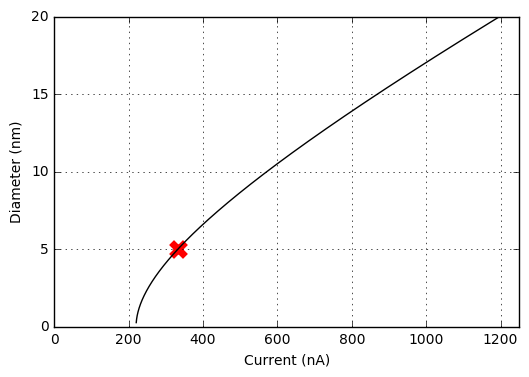

In [12]:
ds = np.linspace(.25*nm, 100*nm, 10000.)
currents = np.array([pore_current(d) + leakage_current for d in ds])

plt.plot(currents/nA, ds/nm, color = 'k')
plt.scatter((pore_current(desired_diameter) + leakage_current)/nA, desired_diameter/nm, marker = 'x', lw = 5, s = 100, color = 'red')

print 'Stop at ', (pore_current(desired_diameter) + leakage_current)/nA, 'nA!'

plt.xlim(0,1250)
plt.ylim(0,20)

plt.xlabel('Current (nA)')
plt.ylabel('Diameter (nm)')





plt.grid()

plt.show()